# Black Friday 2023 retrospective

---

## The brief

> **Client:** E-commerce team at NordShop
>
> **Context:** Black Friday 2023 was our biggest sales event ever. We want to understand user behavior patterns, identify what worked well, and spot any issues we should address before next year.
>
> You have access to mobile app analytics data from October through December 2023.
>
> **Your task:** Explore the data, create visualizations, and present your findings. Focus on insights that would help the strategy team make decisions for next year.

---

## Understanding event-based data

This dataset is **event-based** data - one of the most common formats in modern analytics.

### What is event-based data?

Instead of storing a summary of what happened, event-based data captures **every individual action** a user takes. Each row represents one event:

```
user_123 | 10:00:01 | product_view  | iPhone case
user_123 | 10:00:15 | add_to_cart   | iPhone case
user_123 | 10:00:42 | product_view  | Screen protector
user_123 | 10:01:03 | begin_checkout| 
user_123 | 10:01:28 | purchase      |
```

### Key concepts

- **Event**: A single action (view, click, purchase, etc.)
- **Session**: A group of events from one visit (identified by `session_id`)
- **User**: A person who may have multiple sessions over time (identified by `user_id`)
- **Funnel**: The sequence of events leading to a goal (e.g., view → cart → checkout → purchase)

### Working with event data

Common operations you'll need:
- **Counting events**: How many purchases? How many views?
- **Grouping by time**: Events per day, per week
- **Filtering by event type**: Just purchases, just searches
- **Building funnels**: How many users went from A to B to C?
- **Comparing segments**: iOS vs Android, logged-in vs guest

---

## Available data

**Two versions are available:**
- `analytics_data.csv` - Full dataset (~2.1 million events)
- `analytics_data_sample.csv` - 15% sample (~300k events, faster to work with)


<details>
<summary><strong>Click here for full column reference</strong></summary>
    
| Column | Description |
|--------|-------------|
| `event_timestamp` | Unix timestamp in microseconds |
| `user_id` | Unique user identifier |
| `session_id` | Session identifier |
| `event_name` | Event type (product_view, search, add_to_cart, begin_checkout, purchase, etc.) |
| `product_id` | Product identifier |
| `product_category` | Category 1-6 |
| `operating_system` | iOS or Android |
| `logged_in` | 0 = guest, 1 = logged in |
</details>

---

## Suggested starting points

These are just ideas to get you started. Feel free to explore in any direction!

- How did traffic and sales change over the period?
- Are there differences between iOS and Android users?
- What does the conversion funnel look like (views → cart → checkout → purchase)?
- What happened during Black Friday week?
- Which categories drive the most engagement? The most purchases?
- How do logged-in users behave differently from guests?

---

## Your analysis

*Add cells below to explore the data and create visualizations. Structure it in a good way with subsections and clarity – just like in the previous labs.*

In [22]:
pip install squarify

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import squarify
import matplotlib.dates as mdates

## A. Data Cleaning and Manipulation

### 1. Import the data

In [2]:
df =  pd.read_csv('analytics_data.csv', low_memory=False)
df.head()

,event_timestamp,user_id,session_id,event_name,product_id,product_category,operating_system,logged_in
0,1697481455389879,001DD4215D164F5391A70AD8DDD54F97,1.697481e+09,product_view,73701862.0,Category 6,iOS,0
1,1700083724243309,01B27B9962254394ACEEAA896D784BD0,1.700084e+09,product_view,9366830.0,Category 6,iOS,0
2,1700083752705321,01B27B9962254394ACEEAA896D784BD0,1.700084e+09,product_view,12538392.0,Category 6,iOS,0
3,1697887018685215,078359D0D303439D965E9698DF915989,1.697886e+09,product_view,18825397.0,Category 6,iOS,0
4,1697136149695982,094aa12d0eccf346a5f8f58e4f01562b,1.697136e+09,product_view,81599707.0,Category 6,Android,0


### 2. Check data information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2148168 entries, 0 to 2148167
Data columns (total 8 columns):
 #   Column            Dtype  
---  ------            -----  
 0   event_timestamp   int64  
 1   user_id           object 
 2   session_id        float64
 3   event_name        object 
 4   product_id        float64
 5   product_category  object 
 6   operating_system  object 
 7   logged_in         int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 131.1+ MB


### 3. Change event_timestamp to datetime type

In [4]:
df['normal_time'] = pd.to_datetime(df['event_timestamp'], unit='us')

In [5]:
# extract date only to new column
df['date'] =  pd.to_datetime(df['normal_time'].dt.date)

### 4. Change session_id and product_id type as object

In [6]:
df['session_id'] = df['session_id'].astype(object)
df['product_id'] = df['product_id'].astype(object)

In [7]:
# recheck all the column type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2148168 entries, 0 to 2148167
Data columns (total 10 columns):
 #   Column            Dtype         
---  ------            -----         
 0   event_timestamp   int64         
 1   user_id           object        
 2   session_id        object        
 3   event_name        object        
 4   product_id        object        
 5   product_category  object        
 6   operating_system  object        
 7   logged_in         int64         
 8   normal_time       datetime64[ns]
 9   date              datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(6)
memory usage: 163.9+ MB


### 5. Check duplicate and Nan Value

In [8]:
# count duplicate
df.duplicated().value_counts()

False    2148132
True          36
Name: count, dtype: int64

In [9]:
# drop duplicate
df = df.drop_duplicates()

In [10]:
# recheck the count duplicate
df.duplicated().value_counts()

False    2148132
Name: count, dtype: int64

In [11]:
# count nan value
df.isna().sum()

event_timestamp          0
user_id                  0
session_id              58
event_name               0
product_id          900030
product_category    900110
operating_system         0
logged_in                0
normal_time              0
date                     0
dtype: int64

In [12]:
# change nan value in product_category column to 'Unknown'
df.product_category = df.product_category.fillna('Unknown')

In [13]:
# check all the data 
df.head()

,event_timestamp,user_id,session_id,event_name,product_id,product_category,operating_system,logged_in,normal_time,date
0,1697481455389879,001DD4215D164F5391A70AD8DDD54F97,1697481277.0,product_view,73701862.0,Category 6,iOS,0,2023-10-16 18:37:35.389879,2023-10-16
1,1700083724243309,01B27B9962254394ACEEAA896D784BD0,1700083647.0,product_view,9366830.0,Category 6,iOS,0,2023-11-15 21:28:44.243309,2023-11-15
2,1700083752705321,01B27B9962254394ACEEAA896D784BD0,1700083647.0,product_view,12538392.0,Category 6,iOS,0,2023-11-15 21:29:12.705321,2023-11-15
3,1697887018685215,078359D0D303439D965E9698DF915989,1697885941.0,product_view,18825397.0,Category 6,iOS,0,2023-10-21 11:16:58.685215,2023-10-21
4,1697136149695982,094aa12d0eccf346a5f8f58e4f01562b,1697135697.0,product_view,81599707.0,Category 6,Android,0,2023-10-12 18:42:29.695982,2023-10-12


In [14]:
# check data describe
df.describe()

,event_timestamp,logged_in,normal_time,date
count,2.148132e+06,2.148132e+06,2148132,2148132
mean,1.700404e+15,5.767281e-01,2023-11-19 14:18:31.200096256,2023-11-18 23:40:23.737088256
min,1.696119e+15,0.000000e+00,2023-10-01 00:02:36.572920,2023-10-01 00:00:00
25%,1.698433e+15,0.000000e+00,2023-10-27 18:58:15.751885056,2023-10-27 00:00:00
50%,1.700585e+15,1.000000e+00,2023-11-21 16:40:41.248695808,2023-11-21 00:00:00
75%,1.702418e+15,1.000000e+00,2023-12-12 21:52:40.498917632,2023-12-12 00:00:00
max,1.704067e+15,1.000000e+00,2023-12-31 23:59:51.126781,2023-12-31 00:00:00
std,2.285361e+12,4.940778e-01,NaN,NaN


## B. Explatory Data Analysis

### 1. Count each category

In [15]:
product_category = df.product_category.value_counts(dropna=False)

product_category_plot = product_category.reset_index()
product_category_plot.columns = ['Category', 'Total']

product_category_plot

,Category,Total
0,Unknown,900110
1,Category 1,777293
2,Category 3,220839
3,Category 2,198513
4,Category 4,31291
5,Category 5,19238
6,Category 6,848


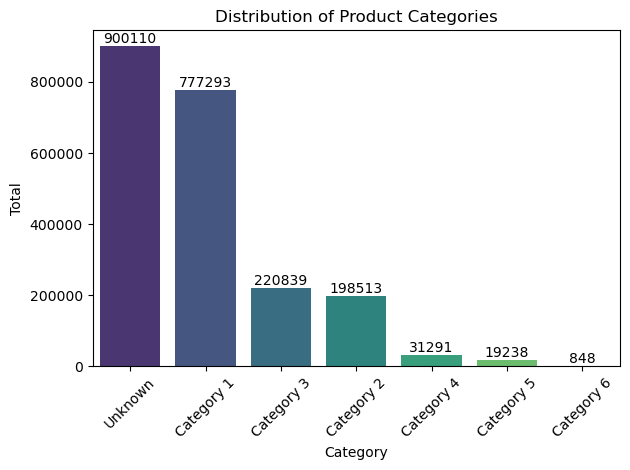

In [16]:
ax = sns.barplot(data=product_category_plot, x='Category', y='Total', hue='Category', legend=False, palette='viridis')
for container in ax.containers:
    ax.bar_label(container, fmt='%d')

plt.title('Distribution of Product Categories')
plt.ylabel('Total')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 2. Count each event_name

In [17]:
event_name = df.event_name.value_counts()
event_name_plot = event_name.reset_index()
event_name_plot.columns = ['Event_Name', 'Total']

event_name_plot

,Event_Name,Total
0,product_view,1097043
1,search,619939
2,filter_start_suggested,134430
3,product_add_list,113360
4,filter_quick,95619
5,add_to_cart,30288
6,list_create,14045
7,begin_checkout,12373
8,product_add_rating,12334
9,purchase,10412


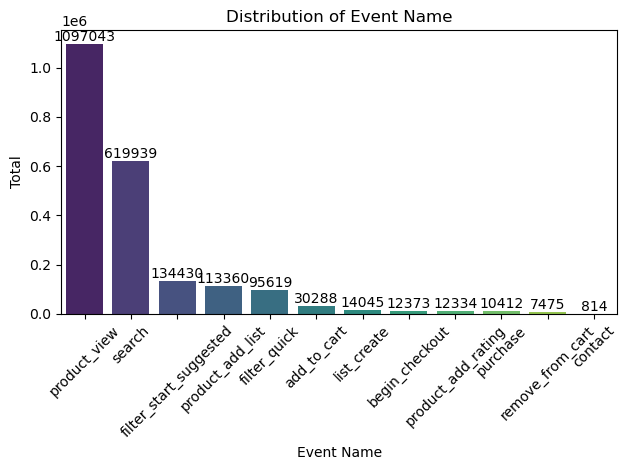

In [18]:
ax = sns.barplot(data=event_name_plot, x='Event_Name', y='Total', hue='Event_Name', legend=False, palette='viridis')
for container in ax.containers:
    ax.bar_label(container, fmt='%d')

plt.title('Distribution of Event Name')
plt.ylabel('Total')
plt.xlabel('Event Name')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 3. Count each total log in

In [19]:
logged_in = df.logged_in.value_counts()
logged_in

logged_in
1    1238888
0     909244
Name: count, dtype: int64

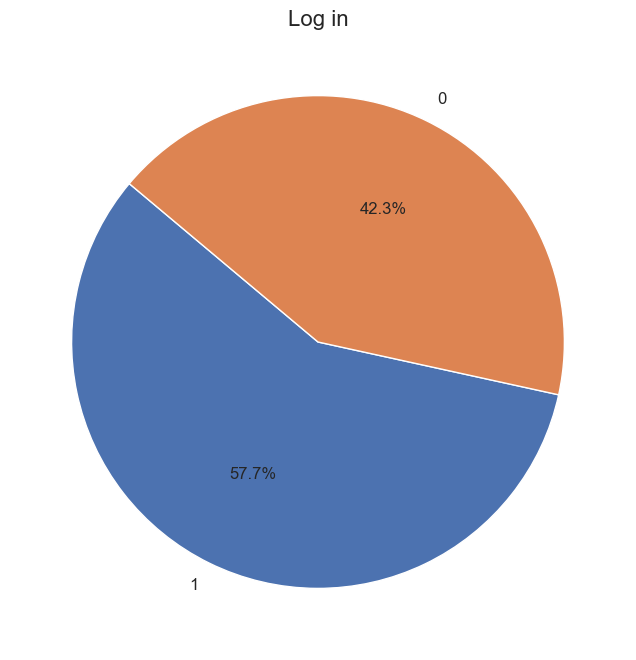

In [20]:
sns.set_theme(style="whitegrid")

# Create the Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(logged_in, 
        labels=logged_in.index, 
        autopct='%1.1f%%', # Adds percentages
        startangle=140,
        textprops={'fontsize': 12}) # Adjust font size
plt.title('Log in', fontsize=16)
plt.show()

### 4. Count each total operating system

In [21]:
operating_system = df.operating_system.value_counts()
operating_system

operating_system
iOS        1528706
Android     619426
Name: count, dtype: int64

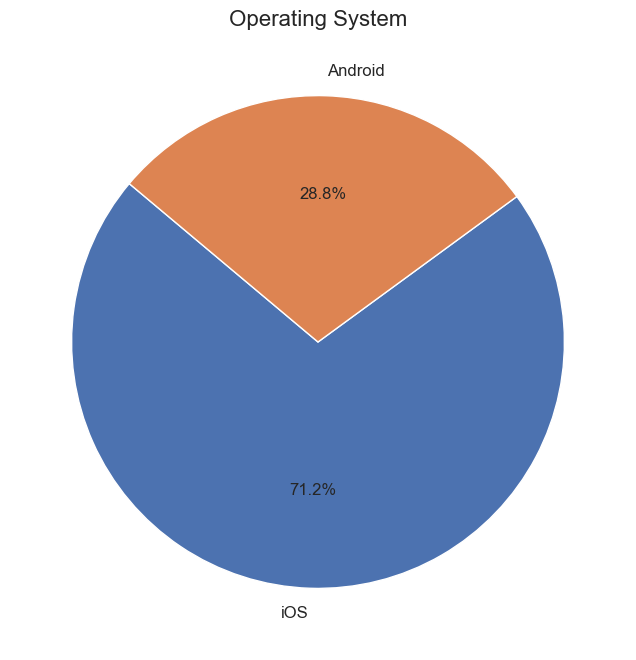

In [22]:
sns.set_theme(style="whitegrid")

# Create the Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(operating_system, 
        labels=operating_system.index, 
        autopct='%1.1f%%', # Adds percentages
        startangle=140,
        textprops={'fontsize': 12}) # Adjust font size

plt.title('Operating System', fontsize=16)
plt.show()

### 4. Count total user per Date

In [23]:
# checking min date
df.date.min()

Timestamp('2023-10-01 00:00:00')

In [24]:
# checking max date
df.date.max()

Timestamp('2023-12-31 00:00:00')

In [25]:
# count total user
date_purchase = df['date'].value_counts().sort_index()
date_purchase_plot = date_purchase.reset_index()
date_purchase_plot.columns = ['Date', 'Total']
date_purchase_plot['Date'] = pd.to_datetime(date_purchase_plot['Date'])

date_purchase_plot

,Date,Total
0,2023-10-01,13321
1,2023-10-02,15437
2,2023-10-03,16568
3,2023-10-04,17353
4,2023-10-05,21413
...,...,...
87,2023-12-27,32868
88,2023-12-28,40589
89,2023-12-29,47728
90,2023-12-30,32883


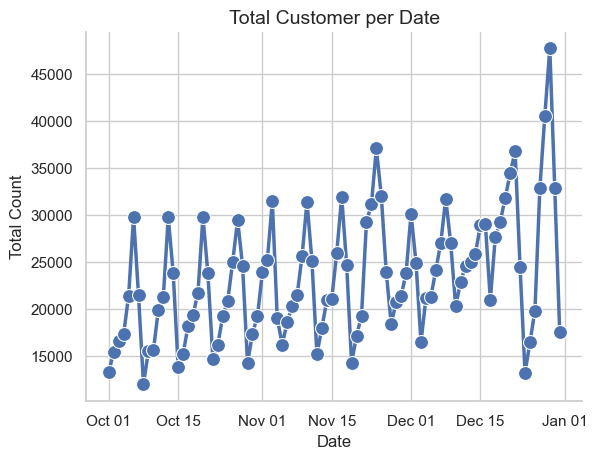

In [26]:
ax = sns.lineplot(
    data=date_purchase_plot, 
    x='Date', 
    y='Total', 
    marker='o', 
    markersize=10, 
    color='#4c72b0',  # Standard nice blue, or pick any hex color
    linewidth=2.5,
)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax.xaxis.set_major_locator(mdates.AutoDateLocator())

plt.title('Total Customer per Date', fontsize=14)
plt.ylabel('Total Count')
plt.xlabel('Date')

sns.despine()                                      # Remove top and right borders

plt.show()

### 5. Check Total User in Weekday

In [56]:
# making new weekday column(0=monday, 6=sunday)
df['DayOfWeek'] = df['date'].dt.dayofweek

dayofweek = df.DayOfWeek.value_counts().reset_index()
dayofweek

,DayOfWeek,count
0,4,426194
1,3,349241
2,5,332872
3,2,308410
4,1,265128
5,0,240094
6,6,226193


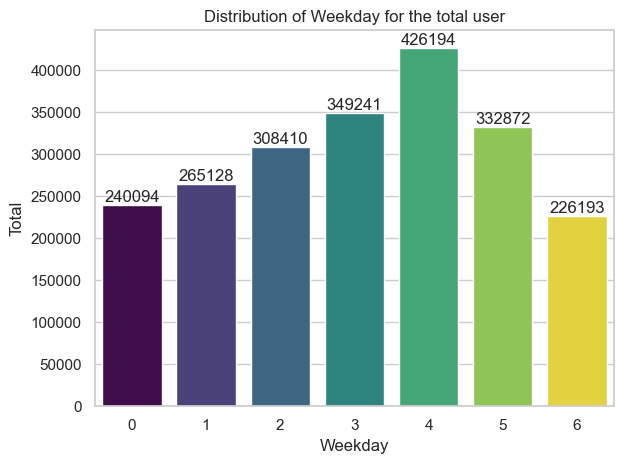

In [68]:
ax = sns.barplot(data=dayofweek, x='DayOfWeek', y='count', hue='DayOfWeek', legend=False, palette='viridis')
for container in ax.containers:
    ax.bar_label(container, fmt='%d')

plt.title('Distribution of Weekday for the total user')
plt.ylabel('Total')
plt.xlabel('Weekday')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### 6. Total Purchase per Weekday

In [61]:
dayofweekpurchase = df[df['event_name'] == 'purchase'].DayOfWeek.value_counts().reset_index()
dayofweekpurchase

,DayOfWeek,count
0,4,1901
1,2,1739
2,3,1701
3,5,1666
4,6,1569
5,0,936
6,1,900


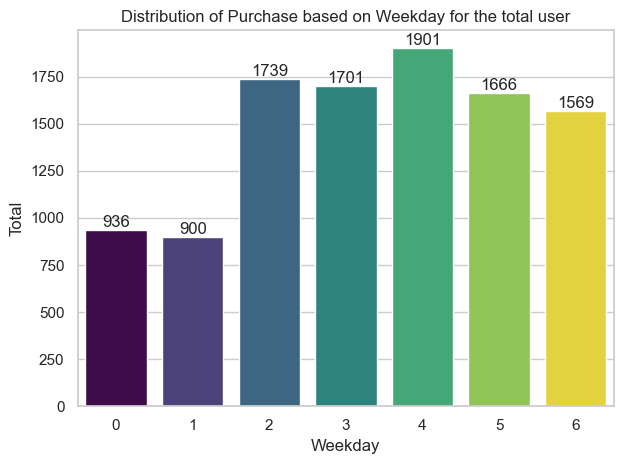

In [69]:
ax = sns.barplot(data=dayofweekpurchase, x='DayOfWeek', y='count', hue='DayOfWeek', legend=False, palette='viridis')
for container in ax.containers:
    ax.bar_label(container, fmt='%d')

plt.title('Distribution of Purchase based on Weekday for the total user')
plt.ylabel('Total')
plt.xlabel('Weekday')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### 7. Total user whether they log in or no based on Product View and Add to Chart

In [27]:
login_stat_view = df[df["event_name"].isin(['product_view','add_to_cart'])]
login_stat_view2 = login_stat_view.groupby(['date',"event_name"])["logged_in"].value_counts().reset_index()
login_stat_view2

,date,event_name,logged_in,count
0,2023-10-01,add_to_cart,1,140
1,2023-10-01,add_to_cart,0,19
2,2023-10-01,product_view,1,4392
3,2023-10-01,product_view,0,2436
4,2023-10-02,add_to_cart,1,238
...,...,...,...,...
362,2023-12-30,product_view,0,7602
363,2023-12-31,add_to_cart,1,68
364,2023-12-31,add_to_cart,0,15
365,2023-12-31,product_view,1,4997


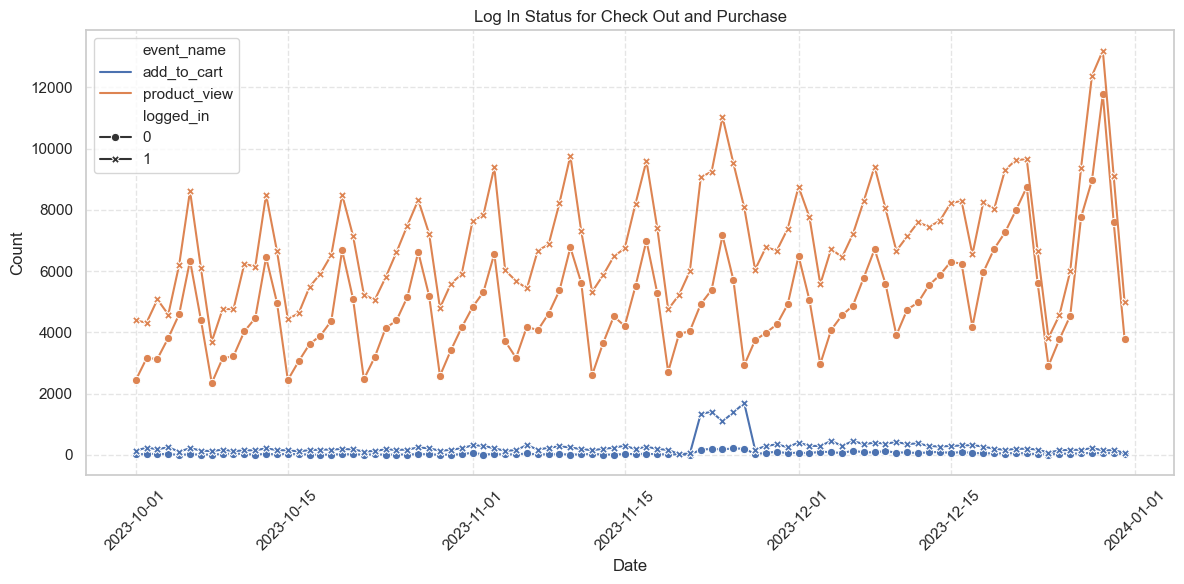

In [28]:
plt.figure(figsize=(12, 6))

sns.lineplot(
    data=login_stat_view2, 
    x='date', 
    y='count', 
    hue='event_name',  
    style='logged_in',  
    markers=True,
    dashes=False       
)

plt.title('Log In Status for Check Out and Purchase')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

plt.show()

### 8. Total user whther they log in or no based on Check Out and Purchase

In [29]:
login_stat = df[df["event_name"].isin(['begin_checkout','purchase'])]
login_stat_purchase = login_stat.groupby(['date',"event_name"])["logged_in"].value_counts().reset_index()
login_stat_purchase

,date,event_name,logged_in,count
0,2023-10-01,begin_checkout,1,45
1,2023-10-01,begin_checkout,0,4
2,2023-10-01,purchase,1,39
3,2023-10-02,begin_checkout,1,82
4,2023-10-02,begin_checkout,0,7
...,...,...,...,...
271,2023-12-30,begin_checkout,0,14
272,2023-12-30,purchase,1,46
273,2023-12-31,begin_checkout,1,31
274,2023-12-31,begin_checkout,0,6


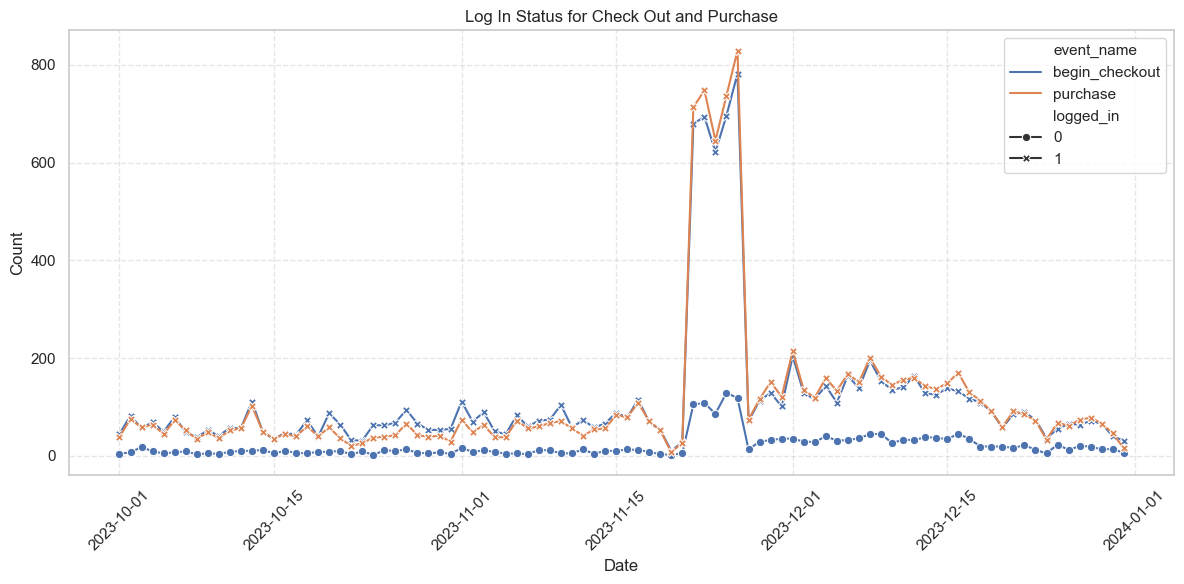

In [30]:
plt.figure(figsize=(12, 6))

sns.lineplot(
    data=login_stat_purchase, 
    x='date', 
    y='count', 
    hue='event_name',  
    style='logged_in',  
    markers=True,
    dashes=False       
)

plt.title('Log In Status for Check Out and Purchase')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

plt.show()

### 9. Total Operating System based on Check Out and Purchase

In [65]:
operating_stat_view = df[df["event_name"].isin(['begin_checkout','purchase'])]
operating_stat_view2 = operating_stat_view.groupby(['date',"event_name"])["operating_system"].value_counts().reset_index()
operating_stat_view2

,date,event_name,operating_system,count
0,2023-10-01,begin_checkout,iOS,36
1,2023-10-01,begin_checkout,Android,13
2,2023-10-01,purchase,iOS,33
3,2023-10-01,purchase,Android,6
4,2023-10-02,begin_checkout,iOS,55
...,...,...,...,...
347,2023-12-30,purchase,Android,17
348,2023-12-31,begin_checkout,iOS,22
349,2023-12-31,begin_checkout,Android,15
350,2023-12-31,purchase,iOS,10


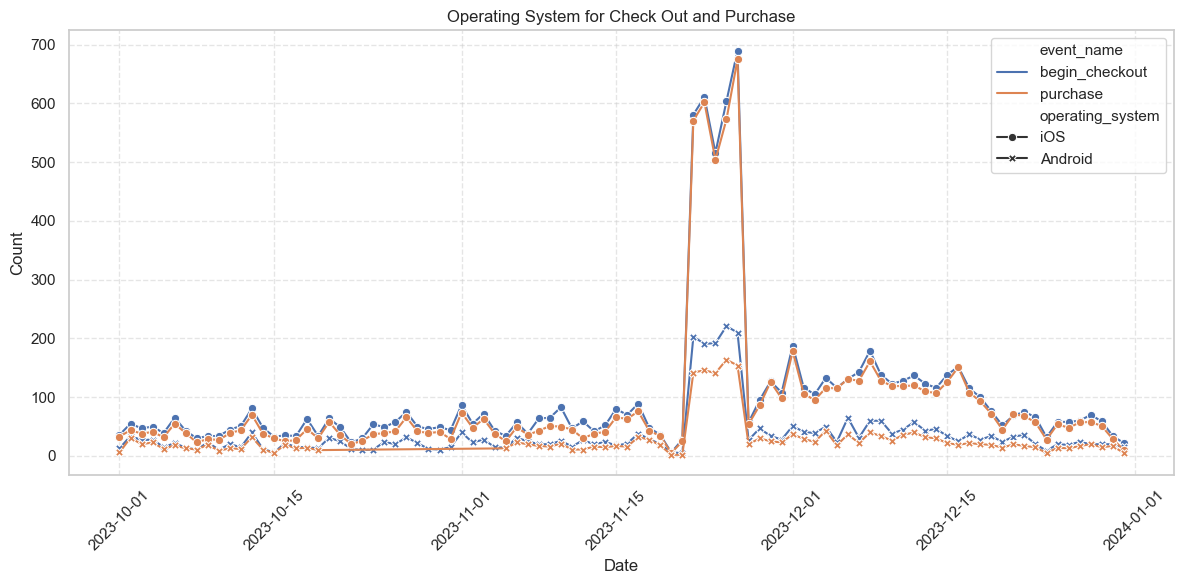

In [66]:
plt.figure(figsize=(12, 6))

sns.lineplot(
    data=operating_stat_view2, 
    x='date', 
    y='count', 
    hue='event_name',  
    style='operating_system',  
    markers=True,
    dashes=False       
)

plt.title('Operating System for Check Out and Purchase')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

plt.show()

## C. EDA only for Black Week dates

In [31]:
# creating new dataframe with only black week date
blackweekdate = df[
    (df['date'] >= '2023-11-21') & 
    (df['date'] <= '2023-12-01')]
blackweekdate

,event_timestamp,user_id,session_id,event_name,product_id,product_category,operating_system,logged_in,normal_time,date
6,1701380025133894,0D6602F71CE64ABBAD418710E7A8102D,1701378953.0,product_view,52053684.0,Category 6,iOS,0,2023-11-30 21:33:45.133894,2023-11-30
7,1701380032614900,0D6602F71CE64ABBAD418710E7A8102D,1701378953.0,product_view,48866286.0,Category 6,iOS,0,2023-11-30 21:33:52.614900,2023-11-30
8,1701380047101906,0D6602F71CE64ABBAD418710E7A8102D,1701378953.0,product_view,9366830.0,Category 6,iOS,0,2023-11-30 21:34:07.101906,2023-11-30
9,1701380116240506,0D6602F71CE64ABBAD418710E7A8102D,1701378953.0,product_view,63582026.0,Category 6,iOS,0,2023-11-30 21:35:16.240506,2023-11-30
13,1700644063130883,18E42A85A33240559C950BC10980A540,1700643944.0,product_view,23406719.0,Category 6,iOS,0,2023-11-22 09:07:43.130883,2023-11-22
...,...,...,...,...,...,...,...,...,...,...
2148158,1701034450000000,9E5D608FE5FF49FFA4C59789839D4FC2,1701638842.0,product_view,64208821.0,Category 5,iOS,1,2023-11-26 21:34:10.000000,2023-11-26
2148159,1701008322000000,C0A09F7F81C44404AC687485487F39E6,1700316880.0,product_view,66451561.0,Category 5,iOS,1,2023-11-26 14:18:42.000000,2023-11-26
2148160,1701011665000000,E36345F7058C4D93A40812299E54C887,1701011572.0,remove_from_cart,87646473.0,Category 5,iOS,1,2023-11-26 15:14:25.000000,2023-11-26
2148161,1701032524000000,ED799A191ED6417AB3D9F568623AB529,1700082001.0,add_to_cart,34458262.0,Category 5,iOS,1,2023-11-26 21:02:04.000000,2023-11-26


### 1. Count total user per date in black week dates

In [32]:
black_week_count = blackweekdate['date'].value_counts().sort_index().reset_index()
black_week_count

,date,count
0,2023-11-21,19272
1,2023-11-22,29259
2,2023-11-23,31139
3,2023-11-24,37108
4,2023-11-25,31989
5,2023-11-26,23903
6,2023-11-27,18384
7,2023-11-28,20781
8,2023-11-29,21360
9,2023-11-30,23856


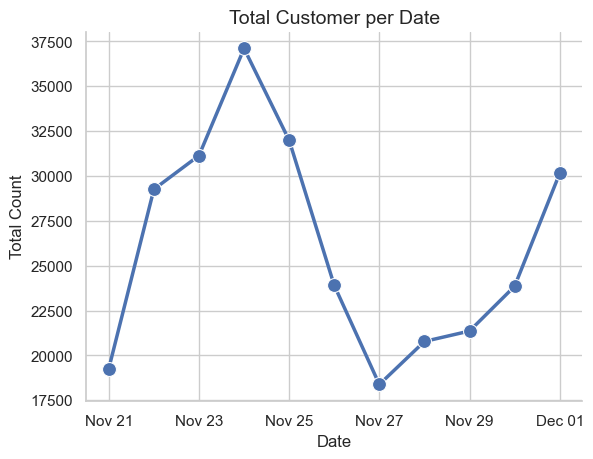

In [33]:
ax = sns.lineplot(
    data=black_week_count, 
    x='date', 
    y='count', 
    marker='o', 
    markersize=10, 
    color='#4c72b0',
    linewidth=2.5,
)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax.xaxis.set_major_locator(mdates.AutoDateLocator())

plt.title('Total Customer per Date', fontsize=14)
plt.ylabel('Total Count')
plt.xlabel('Date')

sns.despine()                        
plt.show()

### 2. Creating category funnel

In [34]:
funnel_steps = ['product_view', 'add_to_cart', 'begin_checkout', 'purchase']

event_name_bw = blackweekdate.event_name.value_counts().reset_index()
event_name_bw.columns = ['Event_Name', 'Total']

funnel = event_name_bw[event_name_bw['Event_Name'].isin(funnel_steps)].copy()
funnel = funnel.set_index('Event_Name').reindex(funnel_steps).reset_index()

funnel['step_conversion'] = funnel['Total'] / funnel['Total'].shift(1)
funnel['step_conversion'] = funnel['step_conversion'].fillna(1.0) # First step is 100%

# Overall Conversion: Current Step / First Step (Product View)
funnel['overall_conversion'] = funnel['Total'] / funnel['Total'].iloc[0]
funnel

,Event_Name,Total,step_conversion,overall_conversion
0,product_view,142200,1.000000,1.000000
1,add_to_cart,9739,0.068488,0.068488
2,begin_checkout,4814,0.494301,0.033854
3,purchase,4376,0.909015,0.030774


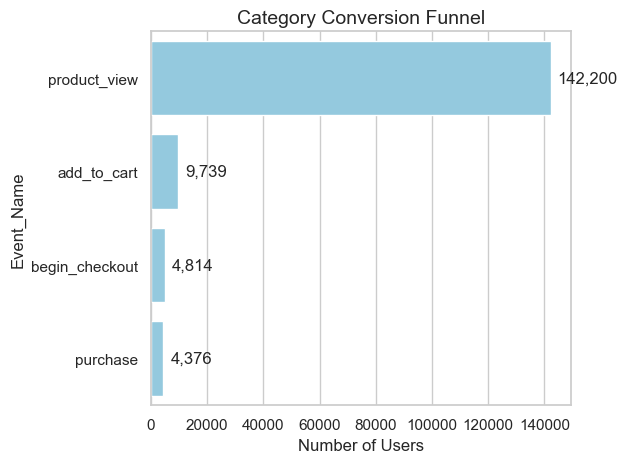

In [35]:
ax = sns.barplot(x='Total', y='Event_Name', data=funnel, color='skyblue')
ax.bar_label(ax.containers[0], labels=[f'{x:,.0f}' for x in funnel['Total']], padding=5)
plt.title('Category Conversion Funnel', fontsize=14)
plt.xlabel('Number of Users')
plt.tight_layout()

plt.show()

### 3. Check Purchase, Checkout, and view per date on black week

In [36]:
blackweek1 = blackweekdate[blackweekdate['event_name'].isin(['product_view','begin_checkout', 'purchase'])]

In [37]:
bw_view_checkout_purchase = blackweek1.groupby(['date', 'event_name']).size().reset_index()
bw_view_checkout_purchase.columns = ['date', 'event_name','total']
bw_view_checkout_purchase

,date,event_name,total
0,2023-11-21,begin_checkout,33
1,2023-11-21,product_view,10053
2,2023-11-21,purchase,27
3,2023-11-22,begin_checkout,784
4,2023-11-22,product_view,13986
5,2023-11-22,purchase,713
6,2023-11-23,begin_checkout,802
7,2023-11-23,product_view,14643
8,2023-11-23,purchase,748
9,2023-11-24,begin_checkout,708


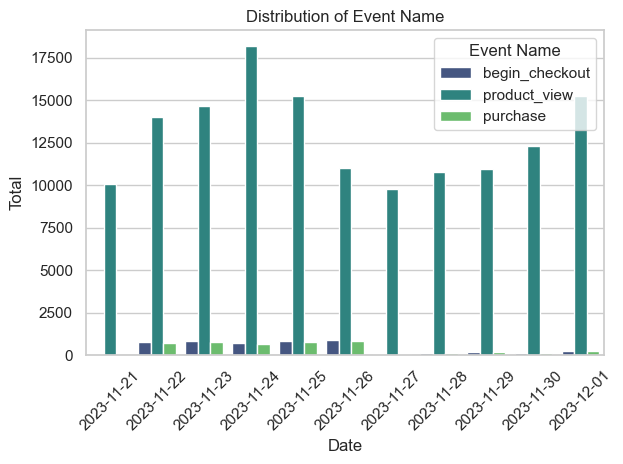

In [38]:
ax = sns.barplot(data=bw_view_checkout_purchase, x='date', y='total', hue='event_name', palette='viridis')

plt.title('Distribution of Event Name')
plt.ylabel('Total')
plt.xlabel('Date')
plt.legend(title='Event Name')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 4. Check all customer based on their log in status per date on black week

In [39]:
bw_purlogin = blackweekdate[blackweekdate["event_name"]=='product_view'].groupby('date')["logged_in"].value_counts().reset_index()
bw_purlogin

,date,logged_in,count
0,2023-11-21,1,6004
1,2023-11-21,0,4049
2,2023-11-22,1,9062
3,2023-11-22,0,4924
4,2023-11-23,1,9254
5,2023-11-23,0,5389
6,2023-11-24,1,11035
7,2023-11-24,0,7167
8,2023-11-25,1,9530
9,2023-11-25,0,5719


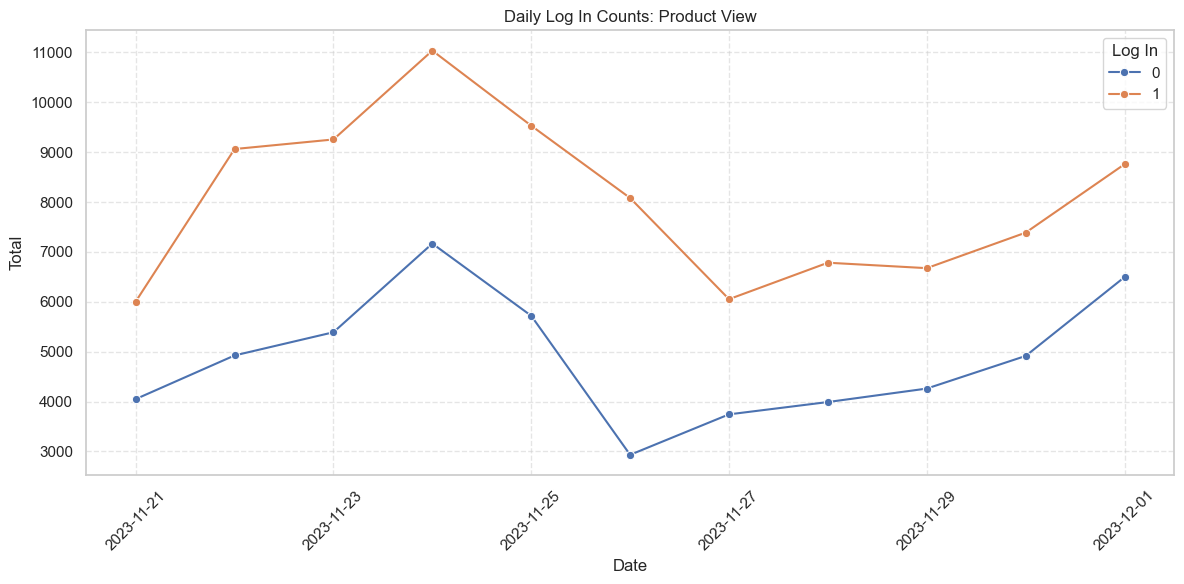

In [40]:
plt.figure(figsize=(12, 6))

sns.lineplot(data=bw_purlogin, x='date', y='count', hue='logged_in', marker='o')

# 3. Formatting
plt.title('Daily Log In Counts: Product View')
plt.xlabel('Date')
plt.ylabel('Total')
plt.xticks(rotation=45)
plt.legend(title='Log In')
plt.grid(True, linestyle='--', alpha=0.5) # Optional: adds a grid for easier reading
plt.tight_layout()

plt.show()

### 5. Check all customer based on operating system per date on black week

In [41]:
bw_opersystem = blackweekdate[blackweekdate["event_name"]=='product_view'].groupby('date')["operating_system"].value_counts().reset_index()
bw_opersystem

,date,operating_system,count
0,2023-11-21,iOS,6882
1,2023-11-21,Android,3171
2,2023-11-22,iOS,9616
3,2023-11-22,Android,4370
4,2023-11-23,iOS,10452
5,2023-11-23,Android,4191
6,2023-11-24,iOS,12933
7,2023-11-24,Android,5269
8,2023-11-25,iOS,10866
9,2023-11-25,Android,4383


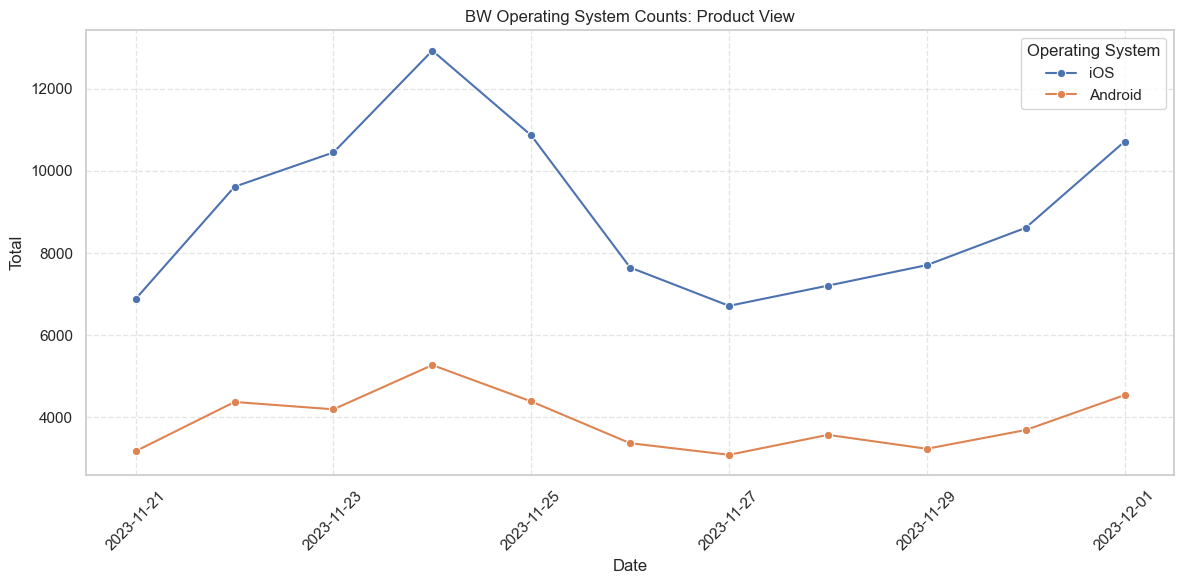

In [42]:
plt.figure(figsize=(12, 6))

sns.lineplot(data=bw_opersystem, x='date', y='count', hue='operating_system', marker='o')

# 3. Formatting
plt.title('BW Operating System Counts: Product View')
plt.xlabel('Date')
plt.ylabel('Total')
plt.xticks(rotation=45)
plt.legend(title='Operating System')
plt.grid(True, linestyle='--', alpha=0.5) # Optional: adds a grid for easier reading
plt.tight_layout()

plt.show()

### 6. Check total user based on check out and purchase only per date in black week

In [43]:
blackweek2 = blackweekdate[blackweekdate['event_name'].isin(['begin_checkout', 'purchase'])]
bw_checkout_purchase = blackweek2.groupby(['date', 'event_name']).size().reset_index()
bw_checkout_purchase

,date,event_name,0
0,2023-11-21,begin_checkout,33
1,2023-11-21,purchase,27
2,2023-11-22,begin_checkout,784
3,2023-11-22,purchase,713
4,2023-11-23,begin_checkout,802
5,2023-11-23,purchase,748
6,2023-11-24,begin_checkout,708
7,2023-11-24,purchase,645
8,2023-11-25,begin_checkout,825
9,2023-11-25,purchase,737


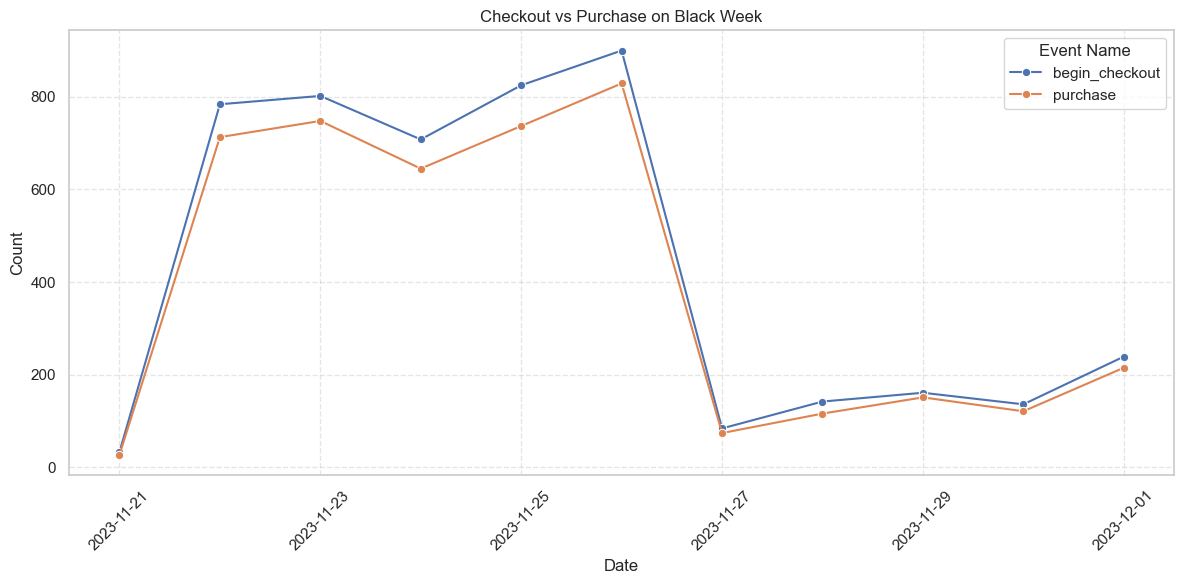

In [44]:
plt.figure(figsize=(12, 6))

sns.lineplot(data=bw_checkout_purchase, x='date', y=0, hue='event_name', marker='o')

# 3. Formatting
plt.title('Checkout vs Purchase on Black Week')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Event Name')
plt.grid(True, linestyle='--', alpha=0.5) # Optional: adds a grid for easier reading
plt.tight_layout()

plt.show()

### 7. Check total user whether they log in or no based on check out and purchase only per date in black week

In [45]:
bw_login = blackweek2.groupby(['date',"event_name"])["logged_in"].value_counts().reset_index()
bw_login

,date,event_name,logged_in,count
0,2023-11-21,begin_checkout,1,28
1,2023-11-21,begin_checkout,0,5
2,2023-11-21,purchase,1,27
3,2023-11-22,begin_checkout,1,679
4,2023-11-22,begin_checkout,0,105
5,2023-11-22,purchase,1,713
6,2023-11-23,begin_checkout,1,694
7,2023-11-23,begin_checkout,0,108
8,2023-11-23,purchase,1,748
9,2023-11-24,begin_checkout,1,622


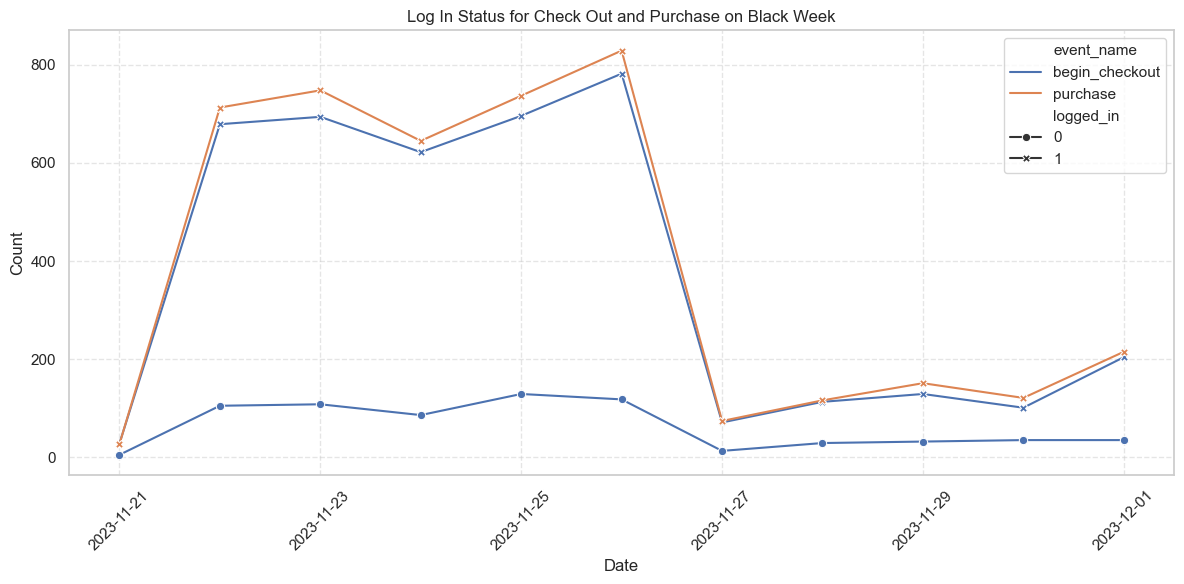

In [46]:
plt.figure(figsize=(12, 6))

sns.lineplot(
    data=bw_login, 
    x='date', 
    y='count', 
    hue='event_name',  
    style='logged_in',  
    markers=True,
    dashes=False       
)

plt.title('Log In Status for Check Out and Purchase on Black Week')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

plt.show()

### 8. Check total operating system based on check out and purchase only per date in black week

In [47]:
bw_operasystem = blackweek2.groupby(['date',"event_name"])["operating_system"].value_counts().reset_index()
bw_operasystem

,date,event_name,operating_system,count
0,2023-11-21,begin_checkout,iOS,28
1,2023-11-21,begin_checkout,Android,5
2,2023-11-21,purchase,iOS,25
3,2023-11-21,purchase,Android,2
4,2023-11-22,begin_checkout,iOS,581
5,2023-11-22,begin_checkout,Android,203
6,2023-11-22,purchase,iOS,571
7,2023-11-22,purchase,Android,142
8,2023-11-23,begin_checkout,iOS,611
9,2023-11-23,begin_checkout,Android,191


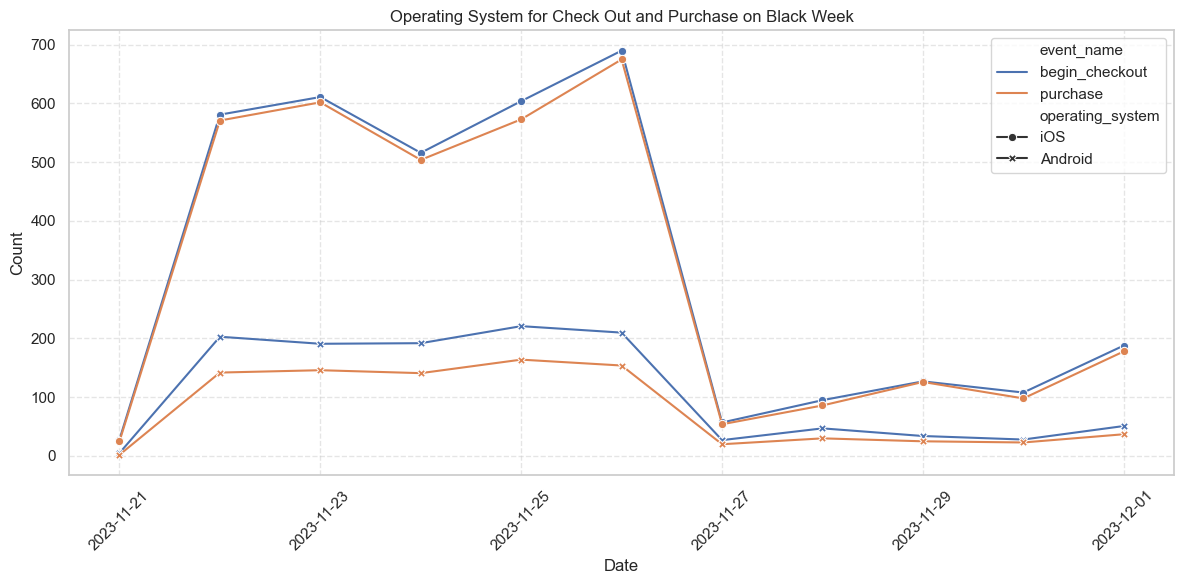

In [48]:
plt.figure(figsize=(12, 6))

sns.lineplot(
    data=bw_operasystem, 
    x='date', 
    y='count', 
    hue='event_name',  
    style='operating_system',  
    markers=True,
    dashes=False       
)

plt.title('Operating System for Check Out and Purchase on Black Week')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

plt.show()

In [49]:
product_category_bw = blackweekdate.product_category.value_counts(dropna=False)

product_category_bw_plot = product_category_bw.reset_index()
product_category_bw_plot.columns = ['Category', 'Total']

product_category_bw_plot

,Category,Total
0,Unknown,119621
1,Category 1,99993
2,Category 2,31751
3,Category 3,29285
4,Category 4,3671
5,Category 5,2782
6,Category 6,98


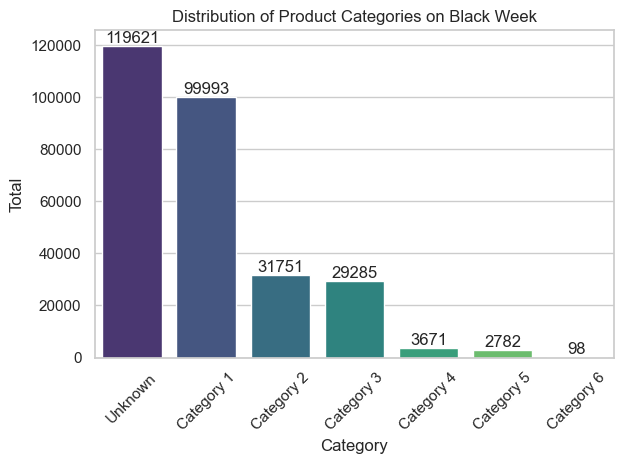

In [50]:
ax = sns.barplot(data=product_category_bw_plot, x='Category', y='Total', hue='Category', legend=False, palette='viridis')
for container in ax.containers:
    ax.bar_label(container, fmt='%d')

plt.title('Distribution of Product Categories on Black Week')
plt.ylabel('Total')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Category Conversion Rate - create conversion rate per category

---

## Your findings & recommendations

*Summarize your key insights for the strategy team. What should they know? What should they do differently next year?*

---

**Key findings:**

1. Most customer only view product and only 1/4 convert to add list and even less when it come to purchase. This also happened on the black week event
2. On Black week event, Total purchase increase significant compare to other day, this also happened on the end of the year when it christmast and new years
3. As I see, the one who can purchase is only people who log in, without log in customer cant purchase.
4. Unknown category is the highest category even on black week holiday. Followed by Category 1.
5. IOS users is bigger than android, even when we see on their purchase behaviour.

**Recommendations for next year:**

1. Currently, customers must log in to make a purchase, which creates a barrier for new users. I recommend we add a "guest checkout" feature that will allow people to buy things without creating an account first. This should help reduce the number of people who leave their carts without paying.
2. My analysis shows that the "Unknown" category is actually our best-performing one. However, this is a risk because we do not know exactly what products are driving these sales. We should do a data audit immediately to label these items correctly so the marketing team can promote them better.
3. Although many people view our product pages, very few actually add items to their cart. To fix this, we could add urgency signals, such as "Low Stock" labels, on the page. We could also send reminders to users who add items to their wishlist but do not buy them.
4. Our sales are very dependent on big events like Black Week and Christmas. To stop sales from dropping in January, we should have a retention strategy. For example, we could send special offers to these holiday buyers to encourage them to come back and shop again early next year.